In [30]:
import matplotlib.pyplot as plt 
import numpy as np

In [31]:
class Wall:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
        self.used = False
    

In [32]:
players = []

class Player:
    def __init__(self, x, y, color, idy):
        self.id = idy
        self.x = x
        self.y = y
        self.color = color
        self.walls = []

    def move_left(self):
        posx = self.x-1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move left, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved left")
        self.x = self.x - 2
                    
    def move_right(self):
        posx = self.x+1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move right, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved right")
        self.x = self.x + 2

    def move_up(self):
        posx = self.x
        posy = self.y-1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move up, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved up")
        self.y = self.y - 2

    def move_down(self):
        posx = self.x
        posy = self.y+1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move down, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved down")
        self.y = self.y + 2
    
    def add_wall(self, wall):
        self.walls.append(wall)

    def place_wall(self, x, y):
        n = len(self.walls)
        if x % 2 == 0 and y % 2 == 0: #only in odd can place a wall
            print("Can't place a wall")
            return
        cont = 0
        for i in range(n):
            if (self.walls[i].used == False):
                self.walls[i].used = True
                self.walls[i].x = x
                self.walls[i].y = y
                print("Player", self.id, "has:", n - (cont + 1), "walls left")
                break
            else:
                cont+=1


In [33]:
def addPlayers(nop):
    initState = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
                 [8, 0, 'gold'],     [8, 16, 'deeppink']]

    for i in range(nop):
        p = Player(initState[i][0], initState[i][1], initState[i][2], i+1)
        players.append(p)

def drawPlayers(ax):
    for p in players:
        ax.text(p.x, p.y, u'\u265F', size=30, 
        ha='center', va='center', color=p.color)

In [34]:
def addWalls(nop):
    initState = [[-1, 3], [17, 3], [3, 17], [3, -1]]
    for p in players:
        j = p.id - 1
        for i in range(20//nop):
            if (j < 2): #first and second, puts walls on the side
                wall = Wall(initState[j][0], initState[j][1] + i, p.color)
            else: #third and fourth, puts walls on top and bottom
                wall = Wall(initState[j][0] + i, initState[j][1], p.color)
            p.add_wall(wall)

def drawWalls(ax):
    for p in players:
        for i in range(len(p.walls)):
            if (p.id <= 2):
                ax.text(p.walls[i].x, p.walls[i].y, u'\u268A', size=30, ha='center',                va='baseline', color=p.walls[i].color)
            else:
                ax.text(p.walls[i].x, p.walls[i].y, u'\u2759', size=20, ha='center',                va='center', color=p.walls[i].color)


In [35]:
#Note, character goes by 2 spaces, because one space is for the walls
def drawQuoridorBoard(nop):
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #add players:
    addPlayers(nop)
    drawPlayers(ax)

    #add walls:
    addWalls(nop)
    drawWalls(ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

In [36]:
def game():
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #since the game already started, you just draw the players
    drawPlayers(ax)

    #just draw the walls
    drawWalls(ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

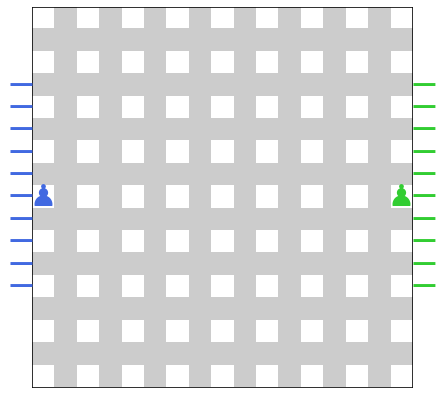

Player 1 has: 9 walls left


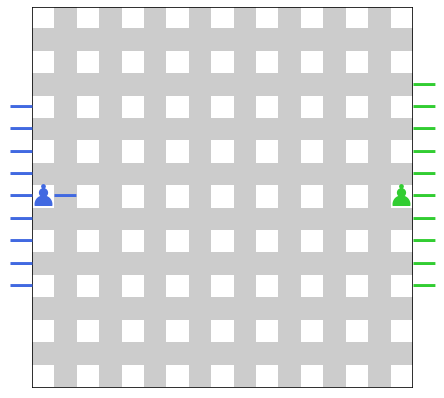

Can't move right, there's a big wall


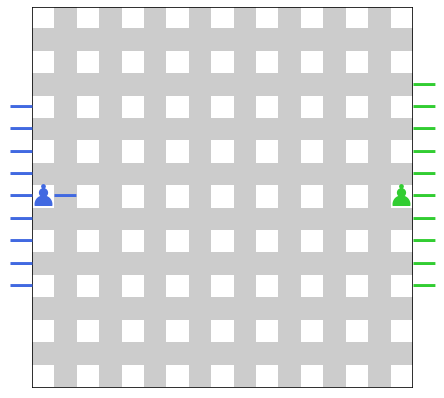

Player:  1 moved down


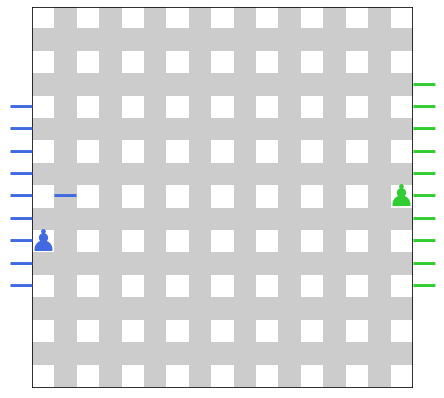

Player:  1 moved right


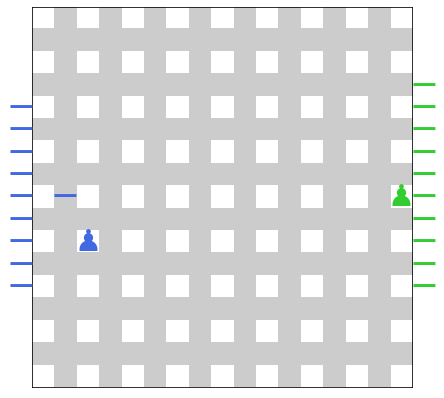

In [37]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 10 number of players (2 or 4)

nop = 2 #number of players

drawQuoridorBoard(nop)
players[0].place_wall(1, 8)
game()
players[0].move_right()
game()
players[0].move_down()
game()
players[0].move_right()
game()